In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 100 # número de generaciones
target = 0         # objetivo de minimización 

In [16]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [17]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[1 0 1 ... 1 0 0]
 [1 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 1 1]]


In [18]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [19]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [20]:
def funcion(x):
    return np.sum(x**2)

In [21]:
def eva_funcion(ind, a, b, m, decimales):
    x = deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [22]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0
 0]
Fenotipo: [ 3.702 -9.724  5.196  7.289 -0.959]
Evaluación f(x): 189.308598

Individuo 2:
Genotipo: [1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1]
Fenotipo: [ 0.484 -1.966  7.271  3.051 -8.636]
Evaluación f(x): 140.85594999999998

Individuo 3:
Genotipo: [0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 0]
Fenotipo: [-8.705  5.067 -8.473  8.041  0.708]
Evaluación f(x): 238.40218800000002

Individuo 4:
Genotipo: [1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0]
Fenotipo: [ 4.543 -1.147  6.974  4.336  1.349]


In [23]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [24]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [25]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

Generación 1 - Mejor evaluación: 40.105
Generación 2 - Mejor evaluación: 35.692
Generación 3 - Mejor evaluación: 29.553
Generación 4 - Mejor evaluación: 23.049
Generación 5 - Mejor evaluación: 22.771
Generación 6 - Mejor evaluación: 15.553
Generación 7 - Mejor evaluación: 15.555
Generación 8 - Mejor evaluación: 15.615
Generación 9 - Mejor evaluación: 14.816
Generación 10 - Mejor evaluación: 14.352
Generación 11 - Mejor evaluación: 9.228
Generación 12 - Mejor evaluación: 8.854
Generación 13 - Mejor evaluación: 8.648
Generación 14 - Mejor evaluación: 4.909
Generación 15 - Mejor evaluación: 3.745
Generación 16 - Mejor evaluación: 4.46
Generación 17 - Mejor evaluación: 4.352
Generación 18 - Mejor evaluación: 3.421
Generación 19 - Mejor evaluación: 2.702
Generación 20 - Mejor evaluación: 1.025
Generación 21 - Mejor evaluación: 1.025
Generación 22 - Mejor evaluación: 1.025
Generación 23 - Mejor evaluación: 0.853
Generación 24 - Mejor evaluación: 0.853
Generación 25 - Mejor evaluación: 0.853


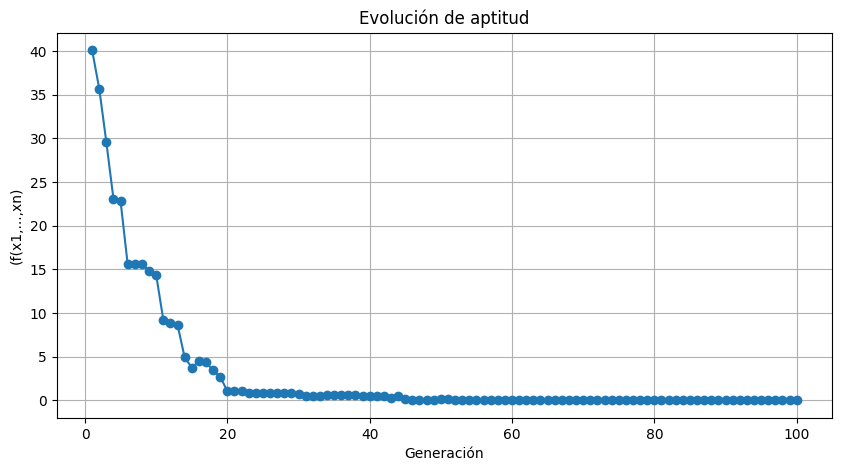

In [26]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target=0):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break
        
        # nueva población
        new_pob = []
        while len(new_pob) < pob_size:
            
            padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
            padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
            
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
